In [1]:
%pylab inline
from champ.sim import multiXCGVF, multiXC, multiXCGVF_midXCs

Populating the interactive namespace from numpy and matplotlib


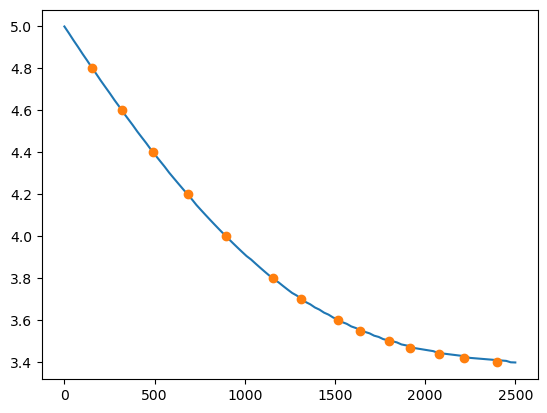

In [2]:
######################
####  GVF Solver #####
######################
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 100)
bed_slope = 0.0016
z = bed_slope * x
sim = multiXCGVF(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)
plot(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


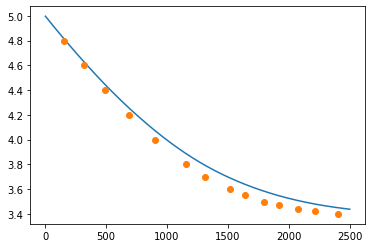

In [11]:
###########################
####  Original Solver #####
###########################
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 500)
bed_slope = 0.0016
z = bed_slope * x
sim_orig = multiXC(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim_orig.calc_flow(h0=5/ft_per_m)
xmids = (sim_orig.x_arr[1:] + sim_orig.x_arr[:-1])/2.
plot(xmids*ft_per_m, sim_orig.fd_mids*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


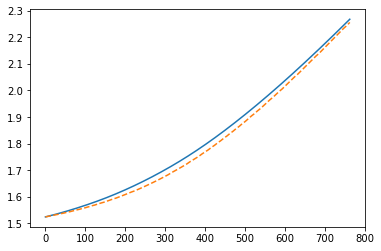

In [12]:
plot(sim_orig.x_arr, sim_orig.h)
plot(sim.x_arr, sim.h, '--')

In [3]:
n=1500
i=197
fd_guess = 1.1578651922678211

fds = linspace(0.99*fd_guess, 1.01*fd_guess, n)
res = []
res_abs = []
xc = sim.xcs[i]
h0 = sim.h[i]# 5/ft_per_m
A_down = xc.calcA(depth=h0)
P_down = xc.calcP(depth=h0)
D_H_down = 4 * A_down / P_down
V_down = Q / A_down
alpha = 1.1
V_head_down = alpha * V_down ** 2 / (2 * xc.g)
            
S_f_down = xc.f * V_down ** 2 / (2 * xc.g * D_H_down)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
for fd in fds:
    res.append(sim.fd_residual(fd, i+1, h0, S_f_down, dx))
    res_abs.append(sim.fd_residual_abs(fd, i+1, h0, S_f_down, dx))

plot(fds, res)
plot(fds, res_abs)
#xlim([1,1.2])
#ylim([-.2,.1])

IndexError: list index out of range

In [4]:
from scipy.optimize import minimize_scalar
i=197
xc = sim.xcs[i]
h0 = sim.h[i]# 5/ft_per_m
A_down = xc.calcA(depth=h0)
P_down = xc.calcP(depth=h0)
D_H_down = 4 * A_down / P_down
V_down = Q / A_down
alpha = 1.1
V_head_down = alpha * V_down ** 2 / (2 * xc.g)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
fd_guess = 1.1578651922678211
S_f_down = xc.f * V_down ** 2 / (2 * xc.g * D_H_down)
res = minimize_scalar(
                    sim.fd_residual_abs,
                    bracket=(0.5 * fd_guess, fd_guess),
                    args=(i + 1, h0, S_f_down, dx),
                )

In [5]:
res

     fun: 2.5715993778874235e-09
    nfev: 29
     nit: 25
 success: True
       x: 1.1093120886522092

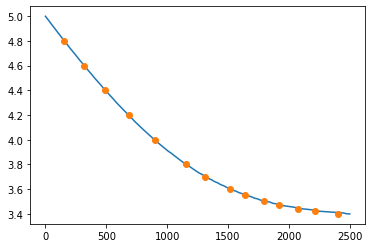

In [4]:
plot(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


In [4]:
sim.xcs[-1].calcNormalFlowDepth(Q, bed_slope)*ft_per_m

3.3735898168045355

In [5]:
sim.xcs[-1].calcCritFlowDepth(Q)*ft_per_m

2.1648781443695433

In [3]:
1.157*ft_per_m

3.7949599999999997

In [16]:
xc = sim.xcs[1]
xc.abs_normal_discharge_residual(3.373589/ft_per_m, bed_slope, Q)

5.3669931290301065e-06

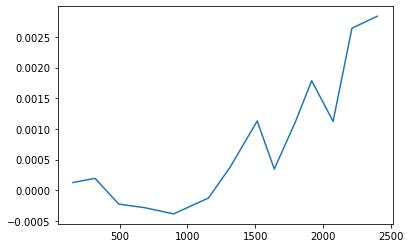

In [6]:
from scipy.interpolate import interp1d
f = interp1d(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
fd_mod = f(x_chow)

rel_err = (fd_mod - fd_chow)/fd_mod
plot(x_chow, rel_err)

In [9]:
fs = []
for xc in sim.xcs:
    fs.append(xc.f)
fs

[0.04779768656073045,
 0.047854523090260614,
 0.047854523090260614,
 0.04791168901208248,
 0.04796918784839909,
 0.0480270231755507,
 0.0480270231755507,
 0.048085198625093806,
 0.04814371788490634,
 0.04820258470032029,
 0.04820258470032029,
 0.048261802875282124,
 0.04832137627354215,
 0.04832137627354215,
 0.04838130881987336,
 0.0484416045013209,
 0.04850226736848299,
 0.04850226736848299,
 0.04856330153682414,
 0.048624711188021676,
 0.048624711188021676,
 0.0486865005713468,
 0.048748674005080754,
 0.048748674005080754,
 0.048811235877967686,
 0.04887419065070499,
 0.048937542857472344,
 0.048937542857472344,
 0.049001297107500785,
 0.0490654580866828,
 0.0490654580866828,
 0.049130030559225046,
 0.049195019369344714,
 0.049195019369344714,
 0.04926042944301109,
 0.04932626578973369,
 0.04932626578973369,
 0.04939253350439853,
 0.04939253350439853,
 0.04945923776915391,
 0.04952638385534741,
 0.04952638385534741,
 0.04959397712551583,
 0.049662023035429555,
 0.049662023035429555,

In [3]:
xc = sim.xcs[0]
xc5 = sim.xcs[5]
xc20 = sim.xcs[20]

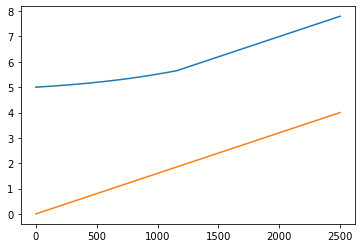

In [10]:
plot(sim.x_arr*ft_per_m, sim.h*ft_per_m)
plot(sim.x_arr*ft_per_m, sim.z_arr*ft_per_m)


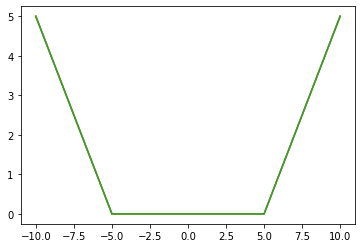

In [4]:
plot(xc.x, xc.y + sim.ymins[0])
plot(xc5.x, xc5.y)
plot(xc20.x, xc20.y)

In [12]:
sim.run_one_step()

In [5]:
sqrt(8)/1.5**2

1.257078722109418

In [6]:
2/0.25**(4/3)

12.699208415745595

In [7]:
(3.54/2.56)**(1/3) 
#Size of effect in friction slope from using
# only one f value to represent n.

1.1140921108647988

In [12]:
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
f

0.051297887908433246

In [25]:
np.size([1,2,3])

3

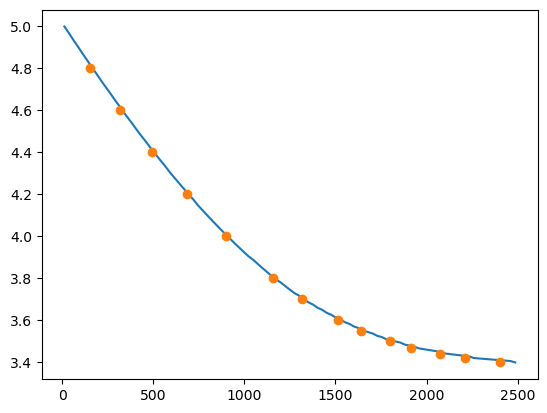

In [6]:
######################
####  GVF mid XC Solver #####
######################
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 100)
bed_slope = 0.0016
z = bed_slope * x
sim = multiXCGVF_midXCs(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)
xmids = (sim.x_arr[1:] + sim.x_arr[:-1])/2
plot(xmids*ft_per_m, sim.fd_mids*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


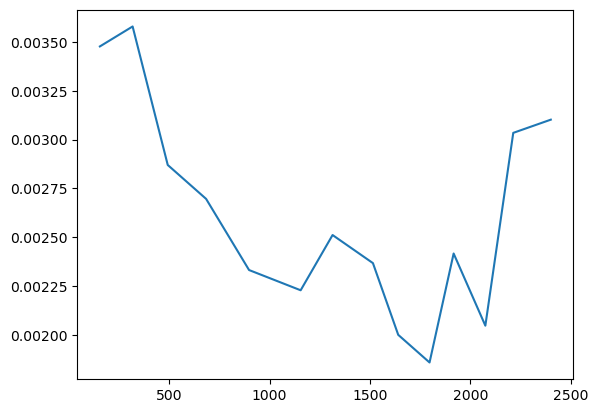

In [7]:
from scipy.interpolate import interp1d
f = interp1d(xmids*ft_per_m, sim.fd_mids*ft_per_m)
fd_mod = f(x_chow)

rel_err = (fd_mod - fd_chow)/fd_mod
plot(x_chow, rel_err)

In [29]:
shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 100)
bed_slope = 0.0016
z = bed_slope * x
sim = multiXCGVF_midXCs(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)

alpha = 1.1
i=50
h0=5/ft_per_m
xc = sim.xcs[i]
print("i=", i)
xc_up = sim.xcs[i + 1]
# Renew interpolation functions
xc_up.create_A_interp()
xc_up.create_P_interp()
xc_up.Q = sim.Q_w  # Otherwise this is done by calcNormalFlowDepth.
# We need to do it explictly here for other XCs
# that aren't the first one.
if i == 0:
    xc.create_A_interp()
    xc.create_P_interp()
    norm_fd = xc.calcNormalFlowDepth(sim.Q_w, sim.slopes[i])
    if h0 is None:
        sim.h[i] = norm_fd + sim.z_arr[i]
        sim.fd_mids[i] = norm_fd
    else:
        sim.h[i] = h0
        if sim.h[i + 1] == 0:
            # If we haven't solved for flow yet, use downstream flow depth
            sim.fd_mids[i] = h0 - sim.z_arr[i]
        else:
            # Otherwise, average flow depth between adjacent nodes
            sim.fd_mids[i] = (
                (h0 - sim.z_arr[i]) + (sim.h[i + 1] - sim.z_arr[i + 1])
            ) / 2

A_down = xc.calcA(depth=sim.fd_mids[i])
P_down = xc.calcP(depth=sim.fd_mids[i])
D_H_down = 4 * A_down / P_down
V_down = sim.Q_w / A_down
V_head_down = alpha * V_down**2 / (2 * xc.g)
zmid = (sim.z_arr[i] + sim.z_arr[i + 1]) / 2
H_down = sim.fd_mids[i] + zmid + V_head_down
if xc.n_mann is not None:
    xc.set_f_from_n_mann(D_H_down)
S_f_down = xc.f * V_down**2 / (2 * xc.g * D_H_down)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
if sim.fd_mids[i + 1] > 0:
    # Use depth from previous timestep if available
    fd_guess = sim.fd_mids[i + 1]
else:
    # Otherwise, use downstream flow depth
    fd_guess = sim.fd_mids[i]
norm_fd = xc.calcNormalFlowDepth(sim.Q_w, sim.slopes[i])
fd_crit = xc_up.calcCritFlowDepth(sim.Q_w)
print('S_f_down=', S_f_down, '  H_down=',H_down, '')

try:
    # Search for best bracket
    n_search = 10
    fd_search = np.linspace(
        fd_guess * 1.5, 0.8 * min([fd_crit, norm_fd]), n_search
    )
    bracket_found = False
    sign_this_res = None
    sign_old_res = None
    j = 0
    while not bracket_found and j + 1 < len(fd_search):
        this_res = sim.fd_residual(
            fd_search[j], i + 1, H_down, S_f_down, dx
        )
        # print("this_res =", this_res)
        sign_this_res = np.sign(this_res)
        if sign_old_res is not None:
            if sign_this_res * sign_old_res == -1:
                # We have a sign change in residual
                low_bracket = fd_search[j]
                high_bracket = fd_search[j - 1]
                bracket_found = True
        sign_old_res = sign_this_res
        j += 1
    # print("bracket found =", bracket_found)
    if not bracket_found:
        low_bracket = fd_crit
        high_bracket = fd_guess * 1.2

    sol = root_scalar(
        sim.fd_residual,
        args=(i + 1, H_down, S_f_down, dx),
        method="brenth",
        x0=fd_guess,
        bracket=(low_bracket, high_bracket),
        xtol=0.00001,
        rtol=0.00005,
    )
    is_converged = sol.converged
except ValueError:
    print("Falling back on minimization solver.")
    is_converged = False


if is_converged:
    fd_sol = sol.root
    flag = sol.flag
    converged = sol.converged
else:
    # Try minimization of abs error
    
    fd_max = xc.ymax - xc.ymin
    res = shgo(
        sim.fd_residual_abs,
        [
            (fd_crit, fd_max),
        ],
        n=32,
        sampling_method="sobol",
        args=(i + 1, H_down, S_f_down, dx),
    )
    
    fd_sol = res.x[0]
# Calculate actual flow depth residual
err = sim.fd_residual(fd_sol, i + 1, H_down, S_f_down, dx)
print("i=", i, "  err=", err, " fd=", fd_sol)


i= 0
1.524390243902439
i= 1
1.5211185566187904
i= 2
1.5174372045061293
i= 3
1.5141998260208678
i= 4
1.5105645981342226
i= 5
1.5069748594192338
i= 6
1.5038665227885506
i= 7
1.5007622561978184
i= 8
1.4972253412334762
i= 9
1.4941368618389843
i= 10
1.490610840531469
i= 11
1.4875837356883572
i= 12
1.484112371538882
i= 13
1.4811500931064776
i= 14
1.4777229341071687
i= 15
1.4748152977654627
i= 16
1.4714603999685594
i= 17
1.4686118194718445
i= 18
1.465293777658416
i= 19
1.4625054287675756
i= 20
1.459230460797811
i= 21
1.4565074106264342
i= 22
1.4537897078878723
i= 23
1.4505558316117668
i= 24
1.4478701163388528
i= 25
1.4446974365501677
i= 26
1.4420810577301113
i= 27
1.4389612047200164
i= 28
1.4364069085575837
i= 29
1.4338526123951512
i= 30
1.4307867474261144
i= 31
1.4282958894506483
i= 32
1.4252695975110765
i= 33
1.4228336416742293
i= 34
1.4204103482422008
i= 35
1.4174560671010745
i= 36
1.415096296056426
i= 37
1.4121996751090595
i= 38
1.409907627601712
i= 39
1.4076155800943644
i= 40
1.404777909

In [30]:
from scipy.optimize import root_scalar, minimize_scalar, shgo
import numpy as np

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}

sim = multiXCGVF(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)
alpha = 1.1
i=50
h0=5/ft_per_m
xc = sim.xcs[i]
print("i=", i)
xc_up = sim.xcs[i + 1]
# Renew interpolation functions
xc_up.create_A_interp()
xc_up.create_P_interp()
xc_up.Q = sim.Q_w  # Otherwise this is done by calcNormalFlowDepth.
# We need to do it explictly here for other XCs
# that aren't the first one.
if i == 0:
    xc.create_A_interp()
    xc.create_P_interp()
    norm_fd = xc.calcNormalFlowDepth(sim.Q_w, sim.slopes[i])
    if h0 is None:
        sim.h[i] = norm_fd + sim.z_arr[i]
        sim.fd[i] = norm_fd
    else:
        sim.h[i] = h0
        sim.fd[i] = h0 - sim.z_arr[i]

A_down = xc.calcA(depth=sim.fd[i])
P_down = xc.calcP(depth=sim.fd[i])
D_H_down = 4 * A_down / P_down
# K_down = xc.calcConvey(sim.fd[i], f=sim.f)
V_down = sim.Q_w / A_down
V_head_down = alpha * V_down**2 / (2 * xc.g)
H_down = sim.h[i] + V_head_down
if xc.n_mann is not None:
    xc.set_f_from_n_mann(D_H_down)
S_f_down = xc.f * V_down**2 / (2 * xc.g * D_H_down)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
if sim.fd[i + 1] > 0:
    fd_guess = sim.fd[i + 1]
else:
    # Use depth from previous XC if available
    fd_guess = sim.fd[i]
norm_fd = xc.calcNormalFlowDepth(sim.Q_w, sim.slopes[i])
fd_crit = xc_up.calcCritFlowDepth(sim.Q_w)
print('S_f_down=', S_f_down, '  H_down=',H_down, '')

try:
    # Search for best bracket
    n_search = 10
    fd_search = np.linspace(
        fd_guess * 1.5, 0.8 * min([fd_crit, norm_fd]), n_search
    )
    bracket_found = False
    sign_this_res = None
    sign_old_res = None
    j = 0
    while not bracket_found and j + 1 < len(fd_search):
        this_res = sim.fd_residual(
            fd_search[j], i + 1, H_down, S_f_down, dx
        )
        # print("this_res =", this_res)
        sign_this_res = np.sign(this_res)
        if sign_old_res is not None:
            if sign_this_res * sign_old_res == -1:
                # We have a sign change in residual
                low_bracket = fd_search[j]
                high_bracket = fd_search[j - 1]
                bracket_found = True
        sign_old_res = sign_this_res
        j += 1
    # print("bracket found =", bracket_found)
    if not bracket_found:
        low_bracket = fd_crit
        high_bracket = fd_guess * 1.2

    sol = root_scalar(
        sim.fd_residual,
        args=(i + 1, H_down, S_f_down, dx),
        method="brenth",
        x0=fd_guess,
        bracket=(low_bracket, high_bracket),
        xtol=0.00001,
        rtol=0.00005,
    )
    is_converged = sol.converged
except ValueError:
    print("Falling back on minimization solver.")
    is_converged = False


fd_sol = sol.root
# Calculate actual flow depth residual
err = sim.fd_residual(fd_sol, i + 1, H_down, S_f_down, dx)

print("i=", i, "  err=", err, " fd=", fd_sol)
xc_up.setFD(fd_sol)


i= 50
S_f_down= 0.0011169283609582064   H_down= 1.8335659605198873 
i= 50   err= 0.0  fd= 1.1334807398885731
